In [1]:
import sys
sys.path.insert(0, '..')

import equation_vae

%matplotlib inline
import numpy as np
from numpy import sin, exp, cos
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
#weights_file = "../eq_vae_h50_c123_cond_L2.hdf5"
weights_file = "/Users/brooks/Downloads/eq_vae_grammar_h200_c234_L10_E50_batchB.hdf5"
model = equation_vae.EquationGrammarModel(weights_file, latent_rep_size=10)

/usr/local/lib/python2.7/site-packages/keras/engine/topology.py:368: UserWarning: The `regularizers` property of layers/models is deprecated. Regularization losses are now managed via the `losses` layer/model property.
  warnings.warn('The `regularizers` property of '


In [3]:
eq = ['3+sin(2+x)',
      'x+exp(x/2)',
      '2*x',
      'exp(2/x)']

In [4]:
z = model.encode(eq)
print z

[[ 0.18916065  0.34183067  0.14437929  0.10831795 -0.31957039 -0.15382004
   0.40064222 -0.19365494 -1.0443089   0.15040214]
 [ 0.19082676  0.37784445  0.13803571  0.21919768 -0.19374643 -0.54044503
   0.49467522  0.28743073 -0.55423826 -0.1174617 ]
 [ 0.40109181  0.21650876  0.10151765 -0.00962324 -0.15016207  0.09206215
  -0.24279359 -0.69673455 -0.75759381  0.27599543]
 [ 0.33859658  0.19383667  0.3370229   0.10517733 -0.11143167 -0.17639792
  -0.01903644 -0.33182472 -0.48783824  0.14510337]]


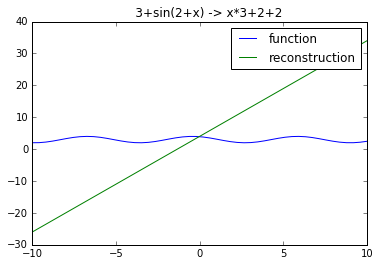

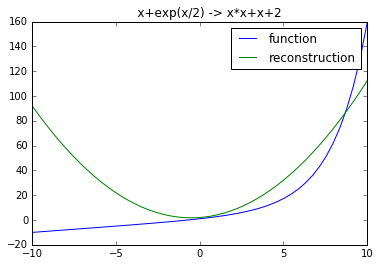

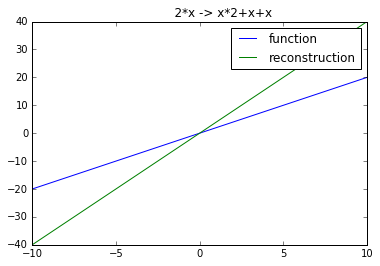

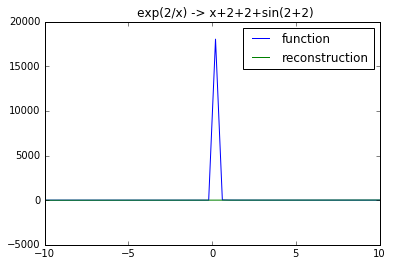

In [5]:
domain = np.linspace(-10,10)
for i, s in enumerate(model.decode(z)):
    plt.figure()
    f = eval("lambda x: "+eq[i])
    f_hat = eval("lambda x: "+s)
    plt.plot(domain, f(domain))
    plt.plot(domain, f_hat(domain))
    plt.legend(["function", "reconstruction"])
    plt.title('%15s -> %s' % (eq[i], s))

In [6]:
'2 / x + 2 + exp( 3 * 2 )'.replace(' ','')

'2/x+2+exp(3*2)'

In [7]:
test = '1 / 3 + x + sin( x * x )'
x = np.linspace(-10,10,1000)
AA = eval(test)

In [8]:
AA[499]

-0.0099098097097771766